In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
import seaborn as sns

In [2]:
true_na_1 = np.load("/media/hdd01/sklee/CA1_clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true_diff_1 = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)
true_na_2 = np.load("/media/hdd01/sklee/CA1_1.5clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true_diff_2 = np.load("/media/hdd01/sklee/CA1_1.5clust12-20/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

one_diff_test_1 = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h1_output.npz")["test"]
two_diff_test_1 = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h2_output.npz")["test"]
gru_diff_test_1 = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
#one_diff_test_2 = np.load("/media/hdd01/sklee/CA1_1.5clust12-20/hand/glm_s18_h1_output.npz")["test"]
two_diff_test_2 = np.load("/media/hdd01/sklee/CA1_1.5clust12-20/hand/glm_s18_h2_output.npz")["test"]
gru_diff_test_2 = np.load("/media/hdd01/sklee/CA1_1.5clust12-20/hand/gru_s18_h20_output.npz")["test"]




In [3]:
diff_var_exp_array = np.zeros((2,3,20))
#nona_var_exp_array = np.zeros((3,3,20))

for i in range(20):
    diff_var_exp_array[0,0,i] = explained_variance_score(true_diff_1[i], one_diff_test_1[i])
    diff_var_exp_array[0,1,i] = explained_variance_score(true_diff_1[i], two_diff_test_1[i])
    diff_var_exp_array[0,2,i] = explained_variance_score(true_diff_1[i], gru_diff_test_1[i])
    #nona_var_exp_array[0,0,i] = explained_variance_score(true_nona_1[i], one_nona_test_1[i])
    #nona_var_exp_array[0,1,i] = explained_variance_score(true_nona_1[i], two_nona_test_1[i])
    #nona_var_exp_array[0,2,i] = explained_variance_score(true_nona_1[i], gru_nona_test_1[i])
    
    #diff_var_exp_array[1,0,i] = explained_variance_score(true_diff_2[i], one_diff_test_2[i])
    diff_var_exp_array[1,1,i] = explained_variance_score(true_diff_2[i], two_diff_test_2[i])
    diff_var_exp_array[1,2,i] = explained_variance_score(true_diff_2[i], gru_diff_test_2[i])
    #nona_var_exp_array[1,0,i] = explained_variance_score(true_nona_2[i], one_nona_test_2[i])
    #nona_var_exp_array[1,1,i] = explained_variance_score(true_nona_2[i], two_nona_test_2[i])
    #nona_var_exp_array[1,2,i] = explained_variance_score(true_nona_2[i], gru_nona_test_2[i])

Text(0.5, 1.0, 'Na+ differential fits (12 clusters only)')

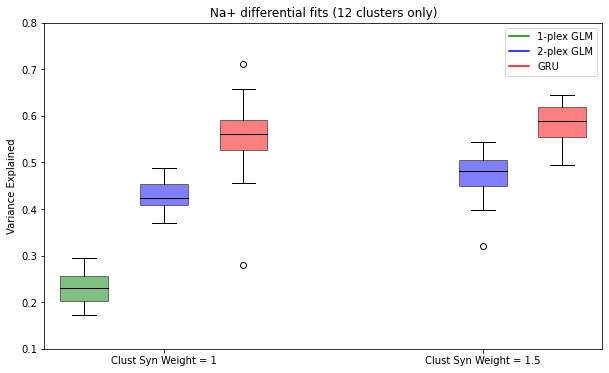

In [21]:
plt.figure(figsize = (10,6))
colors = ["green", "blue", "red"]

bp = plt.boxplot(diff_var_exp_array[0].T, positions=[1,2,3], widths=0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
bp = plt.boxplot(diff_var_exp_array[1].T, positions=[5,6,7], widths=0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
hB, = plt.plot(1,1,'blue')
hR, = plt.plot(1,1,'red')
hG, = plt.plot(1,1,'green')
plt.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

plt.xticks([2,6], labels=["Clust Syn Weight = 1", "Clust Syn Weight = 1.5"])
plt.ylabel("Variance Explained")
plt.ylim(0.1,0.8)
plt.title("Na+ differential fits (12 clusters only)")